In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
#%matplotlib notebook


In [177]:
# Some puzzles and code test bits
# shamelessly ripped off from:
# http://www.kosbie.net/cmu/spring-16/15-112/notes/quiz2-practice.html
#
import numpy
import pylab as plt
import scipy

import math

colors_ = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

In [69]:
# Code tracing?
#
def ct1(n):
    for i in range(n):
        for j in range(n):
            if ((j <= i) and ((i + j) % 2 == 0)):
                print("o", end="")
            elif ((i + j) % 3 == 0):
                print("x", end="")
            else:
                print(".", end="")
        print()
        
ct1(15)

o..x..x..x..x..
.ox..x..x..x..x
oxo.x..x..x..x.
xo.o..x..x..x..
o.o.ox..x..x..x
.o.oxo.x..x..x.
o.oxo.o..x..x..
.oxo.o.ox..x..x
oxo.o.oxo.x..x.
xo.o.oxo.o..x..
o.o.oxo.o.ox..x
.o.oxo.o.oxo.x.
o.oxo.o.oxo.o..
.oxo.o.oxo.o.ox
oxo.o.oxo.o.oxo


In [71]:
# Code Tracing #2 of 2

def ct2(n):
    result = 0
    x = 0
    y = 1
    while (n > 0):
        temp = x
        x += y
        y = temp
        result = 10*result + (x%10)
        n -= 1
    return result

print(ct2(15))

112358314594370


In [34]:
# 2.
# digitCount(n) 
# Write the function digitCount that takes a possibly-negative int and returns the number of digits in it. 
#So, digitCount(12323) returns 5, digitCount(0) returns 1, and digitCount(-111) returns 3. One way you could do 
#this would be to return len(str(abs(n))), but you cannot do that, since you may not use strings here! This can be 
#solved with logarithms, but seeing as this is "loops week", you should instead simply repeatedly remove the ones 
# digit until you cannot.
#
def digitCount(n, base_n=10):
    #
    x = abs(n)
    #
    # we can use an "if" statement to handle n=0. or we can do it this way -- start with 1 digit,
    # and do the first division operation and catch it in the while() loop.
    #
    n_digits = 1
    x//=base_n
    #
    while x > 0:
        x //= base_n
        n_digits+=1
    #
    return n_digits

def testDigitCount():
    print("Testing digitCount()...", end="")
    assert(digitCount(3) == 1)
    assert(digitCount(33) == 2)
    assert(digitCount(3030) == 4)
    assert(digitCount(-3030) == 4)
    assert(digitCount(0) == 1)
    print("Passed!")

testDigitCount()

Testing digitCount()...Passed!


In [64]:
# consecutive digits:
# return true/false if an input string (of numbers) has two equal consecutive digits.
# the original description includes the statement that the number could possibly be negative.
# for variants of this then, there might be some interpretation. for example, if we are looking for consecutive
# consecutive numbers, aka, (1,2). is this True or False for x = -1234? in otherwords, if the number is negative,
# are the digits negative? but we'll address that later.
#
def hasConsecutiveDigits(n, base_n=10, do_count=False):
    # are there equivalent consecutive digits in the number? don't use strings... or lists.
    # so do a sort of old-school, c-style x0,x0 walk through...
    #
    # 
    n_consecutive = 0
    X = abs(int(n))     # ... make a copy of the positive values.
    #
    x0 = X%base_n
    X//=base_n
    #
    while X>0:
        x1 = X%base_n
        X //= base_n
        #
        if x1==x0:
            n_consecutive += 1
            # break
            #
            if not do_count: return True
        #
        x0 = x1
        
    #
    return n_consecutive

In [65]:
print('n: {}'.format(hasConsecutiveDigits('1212111212', do_count=False)))
print('n: {}'.format(hasConsecutiveDigits(-1212111212, do_count=False)))

print('n: {}'.format(hasConsecutiveDigits('1212111212', do_count=True)))
print('n: {}'.format(hasConsecutiveDigits(-1212111212, do_count=True)))

n: True
n: True
n: 2
n: 2


In [66]:
#
def hasConsecutiveDigits_str(n):
    # first, is n a number?
    #
    try:
        #x = int(n)
        x=float(n)
    except:
        # note, it is not clear that this disqualifies n. can 'abc11' or 'aabcd23' qualify? if we are to
        # consider strings, we'll need to be more creative.
        print('input n is not a number.')
        #
        return False
    #
    n=str(n)
    n = n.replace('.','').replace('-','')
    #
    # so we can sonstruct a list comprhension or something like that. if we assuem integers, we can do
    # something like return(True if 0 in numpy.diff([int(x) for x in n]) else False)
    #
    # or keep it simple and maybe more robust:
    # optimized for a strict True/False. a more robust, portable model is to count instances of True
    has_consecutive = False
    for j,s in enumerate(n[1:]):
        if s == n[j]:
            has_consecutive = True
            break
        #
    #
    return has_consecutive
#
def has_n_consecutive_digits(x, n=1):
    # first, is n a number?
    #
    try:
        #x = int(n)
        xf = float(x)
    except:
        # note, it is not clear that this disqualifies n. can 'abc11' or 'aabcd23' qualify? if we are to
        # consider strings, we'll need to be more creative.
        #print('input x is not a number.')
        #
        return False
    #
    x_str=str(x).replace('.','').replace('-','')
    #print('x_str: ', x_str)
    if len(x_str)<(n+1):
        #print('string too short')
        return False
    #
    # so we can sonstruct a list comprhension or something like that. if we assuem integers, we can do
    # something like return(True if 0 in numpy.diff([int(x) for x in n]) else False)
    #
    # or keep it simple and maybe more robust:
    # optimized for a strict True/False. a more robust, portable model is to count instances of True
    #has_consecutive = False
    n_consecutive = 0
    for j,s in enumerate(x_str[1:]):
        if s == x_str[j]:
            n_consecutive+=1
            if n_consecutive >= n: break
        #
    #
    #print('{}/{}: {}'.format(x_str, n, n_consecutive))
    return (n_consecutive>=n)

def testHasConsecutiveDigits():
    print("Testing hasConsecutiveDigits()...", end="")
    assert(hasConsecutiveDigits(0) == False)
    assert(hasConsecutiveDigits(123456789) == False)
    assert(hasConsecutiveDigits(1212) == False)
    assert(hasConsecutiveDigits(1212111212) == True)
    assert(hasConsecutiveDigits(33) == True)
    assert(hasConsecutiveDigits(-1212111212) == True)
    print("Passed!")

def test_has_n_consecutive_digits():
    print("Testing has_n_consecutive_digits()...", end="")
    assert(has_n_consecutive_digits(0,1) == False)
    assert(has_n_consecutive_digits(0,2) == False)
    #
    assert(has_n_consecutive_digits(123456789,1) == False)
    assert(has_n_consecutive_digits(123456789,2) == False)
    assert(has_n_consecutive_digits(123456789,3) == False)
    assert(has_n_consecutive_digits(123456789,4) == False)
    #
    assert(has_n_consecutive_digits(1212,1) == False)
    assert(has_n_consecutive_digits(1212,2) == False)
    assert(has_n_consecutive_digits(1212,3) == False)
    assert(has_n_consecutive_digits(1212,4) == False)
    #
    assert(has_n_consecutive_digits(1212111212,1) == True)
    assert(has_n_consecutive_digits(1212111212,2) == True)
    assert(has_n_consecutive_digits(1212111212,3) == False)
    assert(has_n_consecutive_digits(1212111212,4) == False)
    #
    assert(has_n_consecutive_digits(333,1) == True)
    assert(has_n_consecutive_digits(333,2) == True)
    assert(has_n_consecutive_digits(333,3) == False)
    assert(has_n_consecutive_digits(333,4) == False)
    #
    assert(has_n_consecutive_digits(-12121112122,1) == True)
    assert(has_n_consecutive_digits(-12121112122,2) == True)
    assert(has_n_consecutive_digits(-12121112122,3) == True)
    assert(has_n_consecutive_digits(-12121112122,4) == False)
    
    #
    print("Passed!")

testHasConsecutiveDigits()

test_has_n_consecutive_digits()

Testing hasConsecutiveDigits()...Passed!
Testing has_n_consecutive_digits()...Passed!


In [4]:
def get_factors(x, min_factor=2):
    # min_factor: use this to ex/include self. min_factor=1 will return x as a factor
    # min_factor=2 will include all factors smaller than x.
    # assume x is a positive integer... and for now, just positive-integer truncate.
    #
    x = int(abs(x))
    #
    return [x/j for j in range(min_factor,x+1) if (x/j)%1==0]
#
def get_n_perfetc_numbers(n):
    # could do "nth", but this will be a very short list compared to compute cycles. what shortcuts can 
    # we make to speed up the search? maybe using Euclid's algorithm? gcd(x,y) == gcd(y,x%y) ?? (greatest common denom.)
    #
    #n_perfects = 0
    perfects = []
    j=0
    while len(perfects)<n:
        factors = get_factors(j, min_factor=2)
        #print('{} :: {} // {} // {}'.format(j, factors, numpy.sum(factors), numpy.prod(factors)))
        #
        #if numpy.sum(factors)==numpy.prod(factors): perfects += [j]
        if numpy.sum(factors)==j: perfects+=[j]
        j+=1
        #
        if j>=25000: break
    #
    return perfects


print('factors[5]: {}'.format(get_factors(5)))
print('factors[6]: {}'.format(get_factors(6)))
print('factors[28]: {}'.format(get_factors(28)))
#
print('nth: [1]: {}'.format(get_n_perfetc_numbers(1)))
print('nth: [2]: {}'.format(get_n_perfetc_numbers(2)))
print('nth: [3]: {}'.format(get_n_perfetc_numbers(3)))
print('nth: [5]: {}'.format(get_n_perfetc_numbers(5)))

factors[5]: [1.0]
factors[6]: [3.0, 2.0, 1.0]
factors[28]: [14.0, 7.0, 4.0, 2.0, 1.0]
nth: [1]: [0]
nth: [2]: [0, 6]
nth: [3]: [0, 6, 28]
nth: [5]: [0, 6, 28, 496, 8128]


In [5]:
def nthPerfectNumber(x):
    return get_n_perfetc_numbers(x)[-1]
#
def testNthPerfectNumber():
    # note: there's a bit of interpreting to do here. is 0 a perfect number? 0 or 1 indexing?
    #
    print("Testing nthPerfectNumber()...", end="")
    assert(nthPerfectNumber(2) == 6)
    assert(nthPerfectNumber(3) == 28)
    assert(nthPerfectNumber(4) == 496)  # this can be slow in Brython
    assert(nthPerfectNumber(5) == 8128) # this can be slow even in Standard Python!
    print("Passed!")

testNthPerfectNumber()

Testing nthPerfectNumber()...Passed!


In [76]:
def get_gcd(x0,y0):
    x,y = y0, x0%y0
    if y>0: x,y=get_gcd(x,y)
    #
    return x,y
#
def gcd(x0,y0):
    # note: this is a bit misleading, as it will return x0 for gcd(x,0). since this is a meaningless request,
    # this is not such a bad bug.
    if y0==0: return x0
    #
    return gcd(y0, x0%y0)
#
#
# ... but we were supposed to do this without recursion too, right? 
def gcd2(x0,y0):
    while y0!=0.:
        y  = x0%y0
        x0 = y0
        y0 = y
        #
    #return x0,y0
    return x0


print(gcd(252,105))
print(gcd2(252,105))



def testGcd():
    print("Testing gcd()...", end="")
    assert(gcd(3, 3) == 3)
    assert(gcd(3**6, 3**6) == 3**6)
    assert(gcd(3**6, 2**6) == 1)
    x = 1568160 # 2**5 * 3**4 * 5**1 *        11**2
    y = 3143448 # 2**3 * 3**6 *        7**2 * 11**1
    g =    7128 # 2**3 * 3**4 *               11**1
    assert(gcd(x, y) == g)
    print("Passed!")
def testGcd2():
    print("Testing gcd2()...", end="")
    assert(gcd2(3, 3) == 3)
    assert(gcd2(3**6, 3**6) == 3**6)
    assert(gcd2(3**6, 2**6) == 1)
    x = 1568160 # 2**5 * 3**4 * 5**1 *        11**2
    y = 3143448 # 2**3 * 3**6 *        7**2 * 11**1
    g =    7128 # 2**3 * 3**4 *               11**1
    assert(gcd2(x, y) == g)
    print("Passed!")

print('gcd: ', testGcd())
print('gcd2: ', testGcd2())

/home/myoder/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:69: RuntimeWarning: divide by zero encountered in log


(-2.5, 2.5)

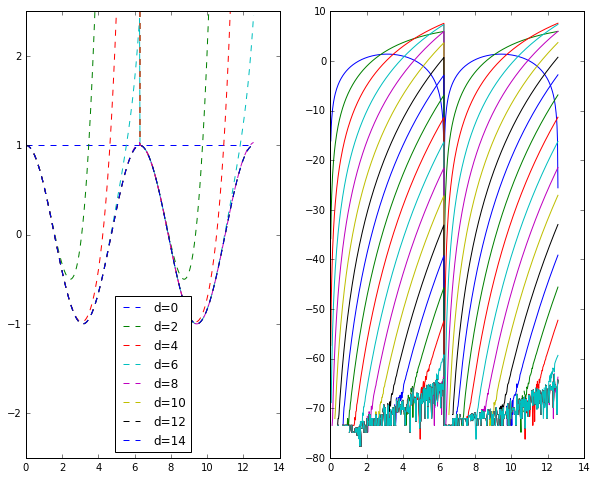

In [197]:
# cos error exercise.
import math

# we could write a factorial code:
def fact(x):
    return numpy.prod(range(1, x+1))
    #x_p = 1
    #for j in range(1,x+1):
    #    x_p *= j
    #return x_p
# or we can just use math.factorial(x).
# note that for large x, this is pretty compute intensive, so 1) we want a compiled version, and 2) for really
# large x, we should use a Sterling approximation.
def cosineError(x, n_deg=4):
    return abs(cos_taylor(x,n_deg) - math.cos(x))
#
def cos_taylor(x, n_deg=4):
    # cos(x) = 1 - x**2/2! + x**4/4! - x**6/6! + ...
    n_deg = int(n_deg)
    x = x%(math.pi*2.)
    #n_deg+=1
    #
    # oh yeah, no lists (for this exercise) either. also, for large n_deg, lists can be inefficient (but really,
    # we're never going to have more than a few elements in a list).
    #
    # we need a parity operator -- which is normally i**n, and there are mechanismes for complex numbers, but
    # since what we need is just binary parity, we'll do something like p = (-1 + 2*n%2)
    #
    # so construct a polynomial like:
    # p = (2.*(k%2)-1)   # (parity operator)
    # xx = x**(2*k)
    # denom = math.factorial(j)
    # y = p*xx/denom
    #
    y_out = 1.
    for k,j in enumerate(range(1, n_deg+1)):
        #
        y_out -= (2.*((j)%2)-1)*(x**(2*j))/math.factorial(2*j)
        #y_out += p*(x**j)/d
    #    
    return y_out
#
# note: the Taylor approximation is only valid for small theta (at least for for small d)
# so let' have a look at what we should expect, of cos_taylor(x) vs cos(x). note also that
# we have added the 2*pi phase moduls operator for good measure.
plt.figure(figsize=(10,8))
plt.clf()
ax1 = plt.subplot('121')
ax2 = plt.subplot('122')
#for theta in numpy.linspace(0, 3.141, 5):
X = numpy.linspace(0., 2*6.282, 500)
Y1 = numpy.cos(X)
#
cos_errors = []
Y0 = numpy.cos(X)
ax.plot(X,Y0, ls='-', marker='', label='cos(x)')
#
for j,d in enumerate(range(0,16,2)):
    clr = colors_[j%len(colors_)]
    #
    Y2 = numpy.array([cos_taylor(x, d) for x in X])
    #
    #cos_errors += [(Y1 - Y2)**2.]
    #
    ax1.plot(X, Y2, '--', label='d={}'.format(d))
#
for j,d in enumerate(range(25)):
    cos_errors += [(Y1-numpy.array([cos_taylor(x, d) for x in X]))**2.]
    ax2.plot(X, numpy.log(cos_errors[-1]), '-')
#ax2.imshow(numpy.log(cos_errors), )
#
ax1.legend(loc=0)
ax1.set_ylim(-2.5, 2.5)
    

In [167]:
print(math.cos(3.141*.5), cosineError(3.141*.5,6))
print(math.cos(1.), cosineError(1,6))

print('** ', math.cos(0), cosineError(0.,2))

print('** ', math.cos(1), cos_taylor(1.,0), cosineError(1.,0))
print('** ', math.cos(1), cos_taylor(1.,2), cosineError(1.,2))
print('** ', math.cos(1), cos_taylor(1.,2), cosineError(1.,2))

0.0002963267905598908 6.304818833680059e-09
0.5403023058681398 1.1422973678065773e-11
**  1.0 0.0
**  0.5403023058681398 1.0 0.45969769413186023
**  0.5403023058681398 0.5416666666666666 0.0013643607985268646
**  0.5403023058681398 0.5416666666666666 0.0013643607985268646


In [176]:
#
def almostEqual(d1, d2, epsilon=1e-4):
    #epsilon = 10**-8
    return abs(d1 - d2) < epsilon
#
# i don't quite get the test here. maybe i've made a mistake somewhere, but it seems that the asertion
# tests are not really meant to pass. remember, sin(x) ~ x for small x, but not for large x...
#
def testCosineError():
    print("Testing cosineError()...", end="")
    assert(almostEqual(cosineError(0, 0), abs(math.cos(0) - 1)))
    #print('ce: ', cosineError(1, 0))
    #assert(almostEqual(cosineError(1, 0), abs(math.cos(1) - 1)))
    
    x = 1.2
    guess = 1 - (x**2)/2. + (x**4)/(4*3*2.)
    guess = cos_taylor(x,4)
    #print('guess: ', guess, cos_taylor(x,2))
    #print('*** ', math.cos(1.2), 1 - x**2/2 + x**4/(4*3*2))
    error = abs(math.cos(x) - guess)
    #print('error: ', error, guess, math.cos(x))
    assert(almostEqual(cosineError(x, 4), error, epsilon=1e-3))
    x = 0.75
    guess = 1 - x**2/2 + x**4/(4*3*2) - x**6/(6*5*4*3*2)
    error = abs(math.cos(x) - guess)
    assert(almostEqual(cosineError(x, 3), error))
    print("Passed!")

testCosineError()

Testing cosineError()...error:  1.6878090406402535e-06 0.36235944228571426 0.3623577544766736
Passed!
